In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49,
            'Br3p' : 1.054, 'Br3d' : 1.054,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Si2p': 0.339})

# Fits quITO from April 2021 

In [3]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/**/*.uxy'
files = glob.glob(path, recursive=True)
files.sort()
files.pop(1)
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_FBI_subl_60min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min_BaCl2_5min.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_clean.uxy']

In [4]:
qito = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_FBI_subl_60min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min_BaCl2_5min.uxy.ft', returning empty fit dict


In [5]:
cols = ['g', 'r', 'g', 'b', 'r']
for xp,c in zip(qito, cols):
    xp.color = c

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd28f28>,
      dtype=object)

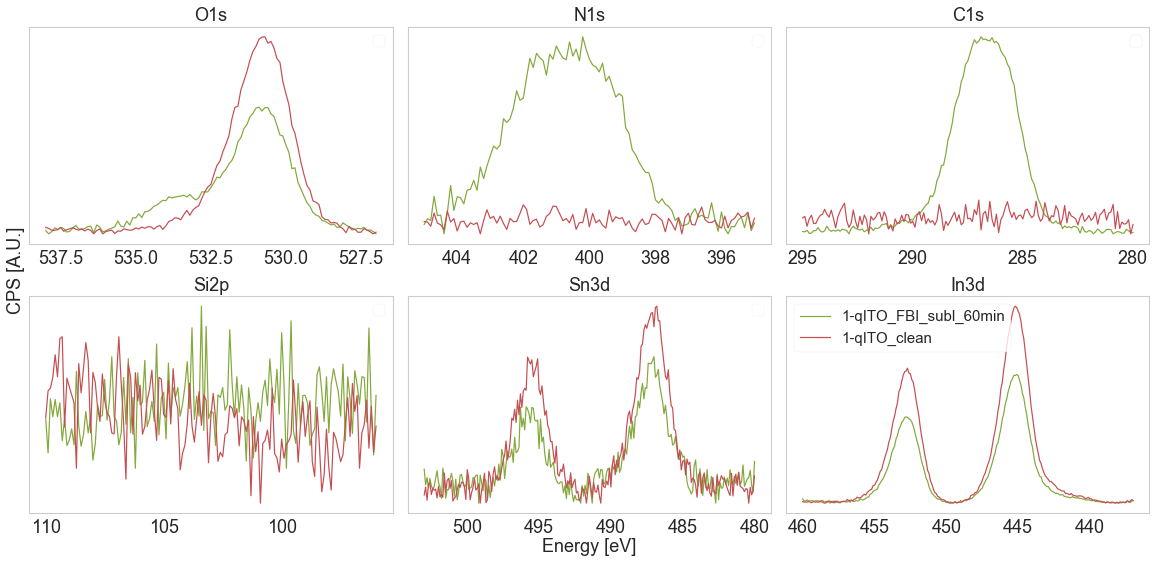

In [6]:
regs = ['O1s', 'N1s', 'C1s', 'Si2p', 'Sn3d', 'In3d']
plot_xp_regions(qito[:2], regs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a283064a8>,
      dtype=object)

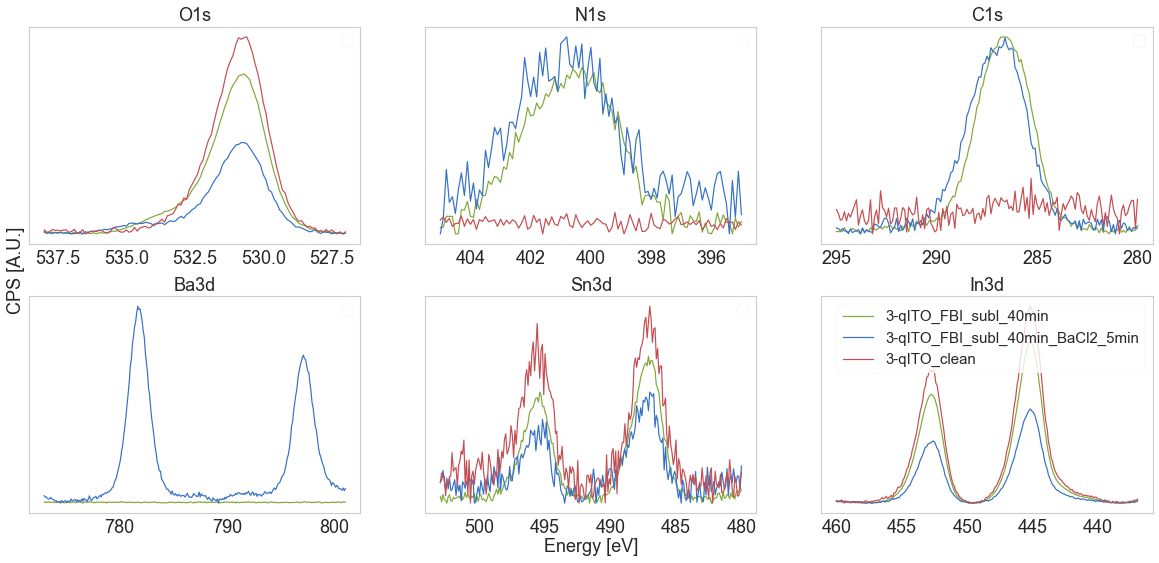

In [102]:
regs = ['O1s', 'N1s', 'C1s', 'Ba3d', 'Sn3d', 'In3d']
plot_xp_regions(qito[2:], regs)

## Fits O 1s

### Sample 1

Modify user pars
Modify user pars


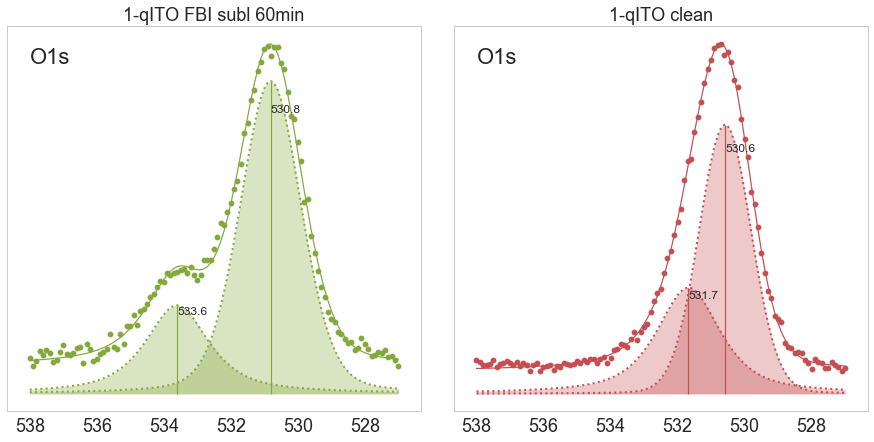

In [7]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6 ), )
region = 'O1s'

for i,xp in enumerate(qito[:2]):
    Fn = XPFit(xp, region=region)
    Fn.preset_pars('v2_sigma', 1.1211)
    fitv = Fn.double_voigt(sepPt=532)

    plot_fit_result(xp, region, ax=ax[i], flag_fill=True)
    Fn.set_areas()
    ax[i].set(title=xp.name.replace('_', ' '))
    ax[i].text(s=region, x=538, y=(ax[i].get_ylim()[1]*0.9), fontsize=22)
    ax[i].set(yticks=[])#, ylim=tuple([yl * 1.05 for yl in ax[i].get_ylim()]))
ax[i].invert_xaxis()
    
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.08)
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/fits_o1s.png', dpi=200)

In [6]:
qito[0].area['O1s_c'] = qito[0].area['O1s'] * qito[0].area['O1s_v2_']

### Sample 3

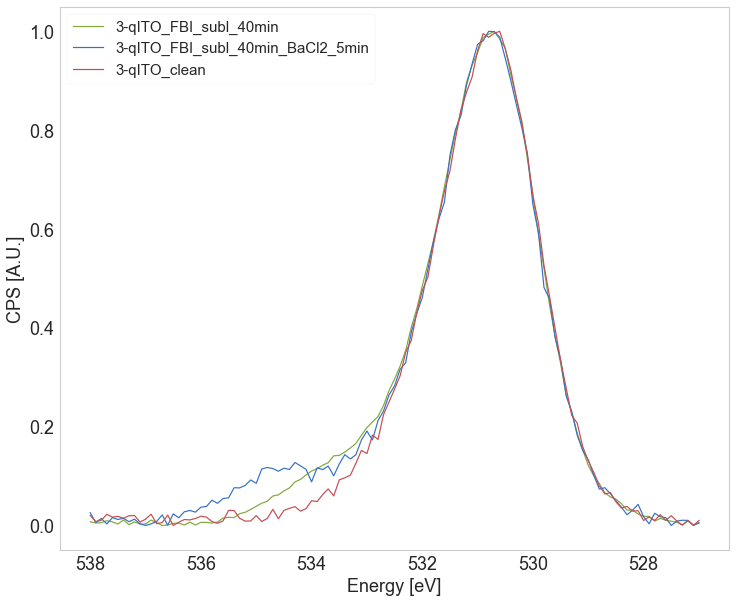

In [139]:
fig = plt.figure(figsize=(12,10))
for xp in qito[2:]:
    plot_region(normalise_dfx(xp), 'O1s')

Modify user pars
Modify user pars
Modify user pars
Modify user pars


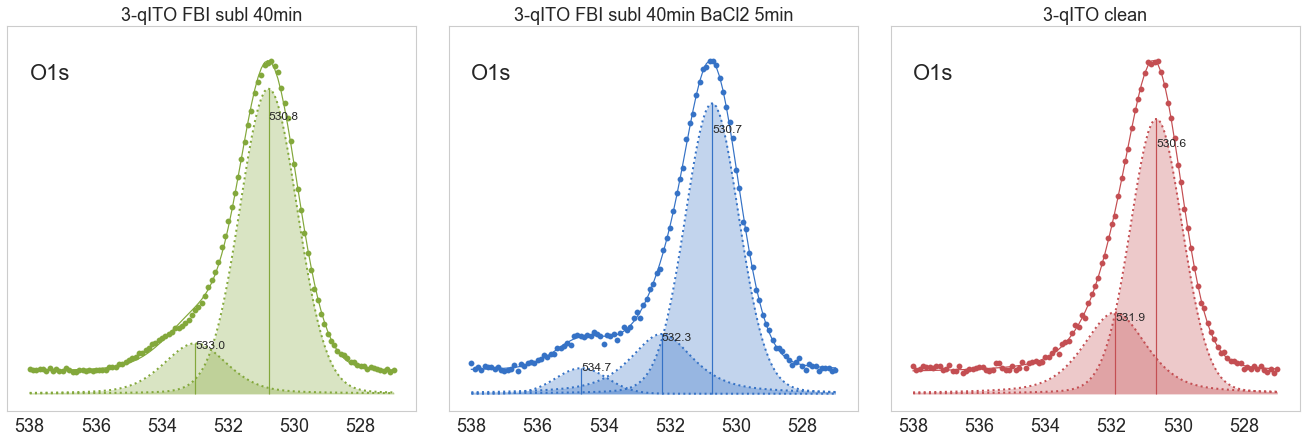

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6 ), )
region = 'O1s'

for i,xp in enumerate(qito[2:]):
    Fn = XPFit(xp, region=region)
    Fn.preset_pars('v2_sigma', 1.1211)
    fitv = Fn.double_voigt(sepPt=532)
    if i == 1:
        pars, bounds = [500, 535, 1], [(300, 800), (534.3, 535.5), (0.7, 1.5)]
        Fn.gauss_shoulder(fitv, par_g = pars, bounds_g = bounds, Ng=1)
    plot_fit_result(xp, region, ax=ax[i], flag_fill=True)
    Fn.set_areas()
    ax[i].set(title=xp.name.replace('_', ' '))
    ax[i].text(s=region, x=538, y=(ax[i].get_ylim()[1]*0.9), fontsize=22)
    ax[i].set(yticks=[], ylim=tuple([yl * 1.05 for yl in ax[i].get_ylim()]))

plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.08)
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/fits_o1s.png', dpi=200)

### Fixing qITO double voigt parameters (position, fraction and sigma)

In [10]:
qito[2], qito[4] = qito[4], qito[2]
# qito[2], qito[3] = qito[3], qito[2]
qito[3], qito[4] = qito[4], qito[3]
[xp.name for xp in qito[2:]]

['3-qITO_clean', '3-qITO_FBI_subl_40min', '3-qITO_FBI_subl_40min_BaCl2_5min']

Modify user pars
Modify user pars
Modify user pars
Modify user pars


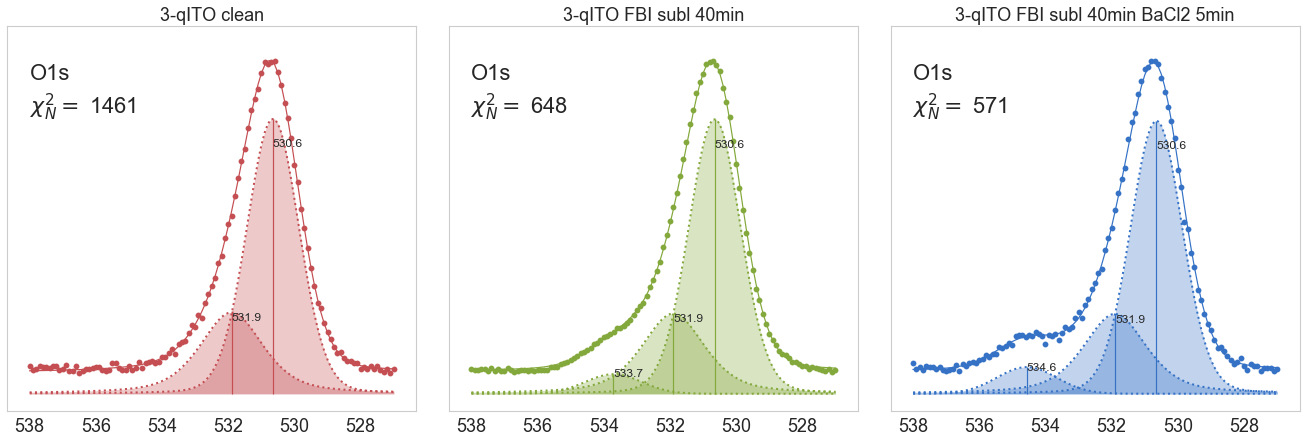

In [11]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6 ), )
region = 'O1s'
pars_clean = ['v1_sigma', 'v1_center', 'v1_fraction', 'v2_sigma', 'v2_center', 'v2_fraction']

for i,xp in enumerate(qito[2:]):
    Fn = XPFit(xp, region=region)
    if i > 0:
        for p in pars_clean:
            Fn.preset_pars(p, qito[2].fit[region].best_values[p])
    if i == 1: Fn.preset_pars('v2_amplitude', 2796.4378)
    if i == 2: Fn.preset_pars('v2_amplitude', 1591.8407)
        
    fitv = Fn.double_voigt(sepPt=532)
    if i > 0:
        pars, bounds = [500, 533, 1], [(300, 800), (532.5, 535), (0.7, 1.5)]
        fitvg = Fn.gauss_shoulder(fitv, par_g = pars, bounds_g = bounds, Ng=1)
#     if i > 1:
#         pars, bounds = [500, 533, 1], [(300, 800), (530.5, 535), (0.7, 1.5)]
#         Fn.gauss_shoulder(fitvg, par_g = pars, bounds_g = bounds, Ng=2)
    plot_fit_result(xp, region, ax=ax[i], flag_fill=True)
    Fn.set_areas()
    ax[i].set(title=xp.name.replace('_', ' '))
    ax[i].text(s=region, x=538, y=(ax[i].get_ylim()[1]*0.9), fontsize=22)
    ax[i].text(s='$\\chi_N^2 =$ %i' %xp.fit[region].redchi, x=538, y=(ax[i].get_ylim()[1]*0.8), fontsize=22)
    
    ax[i].set(yticks=[], ylim=tuple([yl * 1.05 for yl in ax[i].get_ylim()]))

plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.08)

In [328]:
iratio = qito[2].fit[region].best_values['v2_amplitude'] / qito[2].fit[region].best_values['v1_amplitude'] 
iratio*qito[3].fit[region].best_values['v1_amplitude'], qito[3].fit[region].best_values['v2_amplitude']

(2833.560287059529, 2796.4378)

In [326]:
iratio, qito[3].fit[region].best_values['v2_amplitude'] / qito[3].fit[region].best_values['v1_amplitude'] 

(0.4237862544523817, 0.41823422867803683)

In [327]:
iratio*qito[4].fit[region].best_values['v1_amplitude'], qito[4].fit[region].best_values['v2_amplitude']

(1591.8407078200833, 1677.303936230586)

In [326]:
iratio, qito[3].fit[region].best_values['v2_amplitude'] / qito[3].fit[region].best_values['v1_amplitude'] 

(0.4237862544523817, 0.41823422867803683)

In [314]:
qito[4].fit[region].redchi

469.10261200216183

### Subtract qITO contribution v1 and v2

[[],
 (-196.29898807768245, 4122.278749631331),
 Text(0.5, 1.0, 'v1, v2 subtraction')]

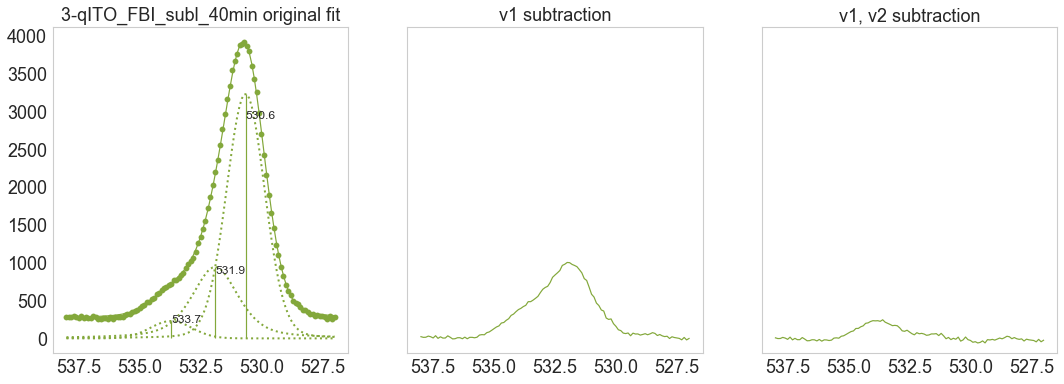

In [12]:
xp = qito[3]
region = 'O1s'
x = xp.dfx[region].dropna().energy.values
y = xp.dfx[region].dropna().counts.values

fitRes = xp.fit[region]
comps = fitRes.eval_components(x=x)
yv1 = comps['v1_']
yv2 = comps['v2_']
ys1 = y - yv1
ys2 = ys1 - yv2

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6))
plot_fit_result(xp, region, ax=ax[0])
ax[0].set(title=xp.name+ ' original fit')
lim = ax[0].get_ylim()
ax[1].plot(x, ys1, 'g')
ax[1].set(title='v1 subtraction', ylim=lim, yticks=[])
ax[2].plot(x, ys2, 'g')
ax[2].set(title='v1, v2 subtraction', ylim=lim, yticks=[])


[[],
 (-112.22015903161747, 2356.623339663967),
 Text(0.5, 1.0, 'v1, v2 subtraction')]

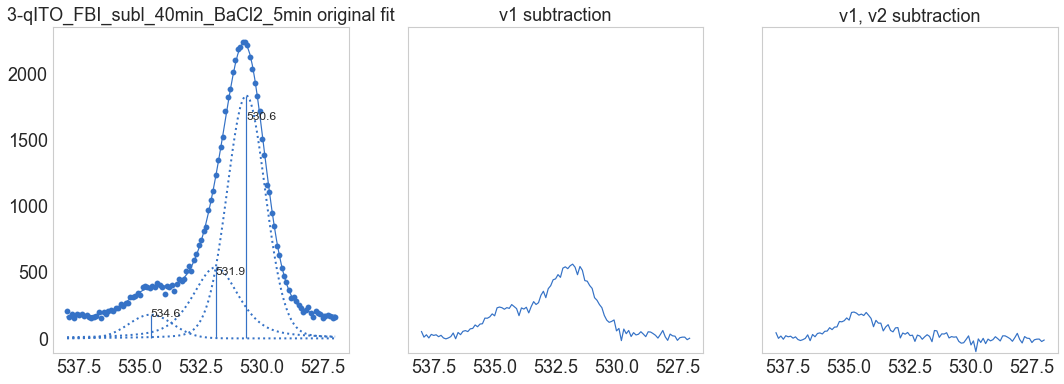

In [13]:
xp = qito[4]
region = 'O1s'
x = xp.dfx[region].dropna().energy.values
y = xp.dfx[region].dropna().counts.values

fitRes = xp.fit[region]
comps = fitRes.eval_components(x=x)
yv1 = comps['v1_']
yv2 = comps['v2_']
yb1 = y - yv1
yb2 = yb1 - yv2

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6))
plot_fit_result(xp, region, ax=ax[0])
ax[0].set(title=xp.name+ ' original fit')
lim = ax[0].get_ylim()
ax[1].plot(x, yb1)
ax[1].set(title='v1 subtraction', yticks=[], ylim=lim)
ax[2].plot(x, yb2)
ax[2].set(title='v1, v2 subtraction', yticks=[], ylim=lim)


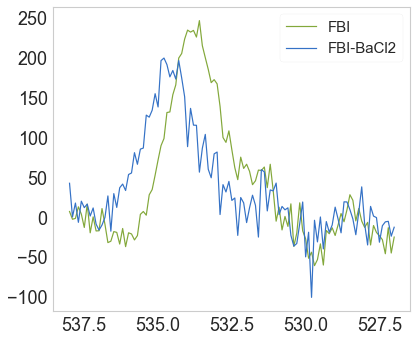

In [14]:
plt.plot(x, ys2, 'g', label='FBI')
plt.plot(x, yb2, 'b', label='FBI-BaCl2')
plt.gca().invert_xaxis()
plt.legend()

In [383]:
xp = qito[4]
region = 'O1s'

def subtract_fit_component(xp: XPS_experiment, region:str, prefix: str, fitRes = None,
                           flag_plot:bool = True, inplace:bool = False):
    """Subtract a fit component from the data, prefix specifies which component
        Returns XPS_experiment: a single dfx region with the subtraction result"""
    x = xp.dfx[region].dropna().energy.values
    y = xp.dfx[region].dropna().counts.values
    if fitRes == None:  fitRes = xp.fit[region]
        
    comps = fitRes.eval_components(x=x)
    yv1 = comps[prefix]
    yb1 = y - yv1
    if flag_plot:
        fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
        plot_fit_result(xp, region, ax=ax[0])
        ax[0].set(title=xp.name+ ' original fit')
        lim = ax[0].get_ylim()
        ax[1].plot(x, yb1, color=xp.color)
        ax[1].set(title='v1 subtraction', yticks=[], ylim=lim)
    
    frames = [pd.DataFrame([x, y]).T, pd.DataFrame([x, yb1]).T]
    dfnew = pd.concat(frames, axis=1)
    mi = pd.MultiIndex.from_product([[region, region+'-v1-v2'], np.array(['energy', 'counts'])])
    mi.to_frame()
    dfnew.columns = mi
    xpnew = XPS_experiment(dfx=dfnew, name=xp.name, fit={region: fitRes})
    
    if inplace:
        insert_dfx_region(xp, xpnew, region='O1s-v1-v2', inplace=True)
    else:
        return xpnew

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/pandas/core/internals/construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: cannot handle a non-unique multi-index!

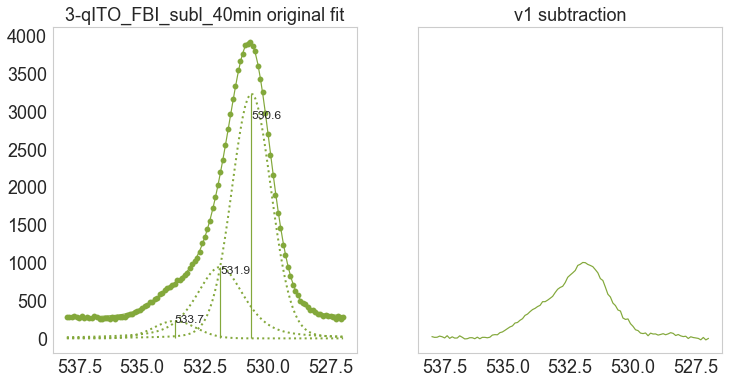

In [388]:
subtract_fit_component(qito[3], region, prefix='v1_', inplace=True)
subtract_fit_component(qito[3], 'O1s-v1-v2', prefix='v2_', fitRes=xp.fit['O1s'])

In [387]:
qito[3].dfx

Ba3d              Ba4d               C1s             Cl2p             \
     energy     counts energy     counts energy    counts energy     counts   
0     801.0  39.056979  100.0  10.766922  295.0   3.93750  204.0   0.625000   
1     800.9  50.364316   99.9  31.754967  294.9   4.09375  203.9  14.250000   
2     800.8  63.984114   99.8   9.055502  294.8   3.67708  203.8   0.000000   
3     800.7  33.978783   99.7  24.543483  294.7   4.59375  203.7   7.719179   
4     800.6  10.660670   99.6   9.406359  294.6  10.93750  203.6   7.573982   
...     ...        ...    ...        ...    ...       ...    ...        ...   
1200    NaN        NaN    NaN        NaN    NaN       NaN    NaN        NaN   
1201    NaN        NaN    NaN        NaN    NaN       NaN    NaN        NaN   
1202    NaN        NaN    NaN        NaN    NaN       NaN    NaN        NaN   
1203    NaN        NaN    NaN        NaN    NaN       NaN    NaN        NaN   
1204    NaN        NaN    NaN        NaN    NaN       NaN    NaN        NaN   

       In3d            ... O1s-v1-v2              Si2p              Sn3d  \
     energy    counts  ...    energy     counts energy     counts energy   
0     460.0  185.8750  ...     538.0  22.649153  110.0  15.857452  503.0   
1     459.9  151.0000  ...     537.9  13.451530  109.9  19.629874  502.9   
2     459.8  145.8125  ...     537.8  15.060822  109.8  24.902280  502.8   
3     459.7  164.9375  ...     537.7  30.101721  109.7  13.424635  502.7   
4     459.6  101.6875  ...     537.6  21.542695  109.6  23.321878  502.6   
...     ...       ...  ...       ...        ...    ...        ...    ...   
1200    NaN       NaN  ...       NaN        NaN    NaN        NaN    NaN   
1201    NaN       NaN  ...       NaN        NaN    NaN        NaN    NaN   
1202    NaN       NaN  ...       NaN        NaN    NaN        NaN    NaN   
1203    NaN       NaN  ...       NaN        NaN    NaN        NaN    NaN   
1204    NaN       NaN  ...       NaN        NaN    NaN        NaN    NaN   

                   overview          O1s-v1-v2             
       counts        energy   counts    energy     counts  
0     37.1875  1.200000e+03  10960.0     538.0  22.649153  
1      6.1875  1.199000e+03  10635.0     537.9  13.451530  
2     48.3750  1.198000e+03  10690.0     537.8  15.060822  
3     18.5000  1.197000e+03  10505.0     537.7  30.101721  
4     16.0625  1.196000e+03  11155.0     537.6  21.542695  
...       ...           ...      ...       ...        ...  
1200      NaN -2.273737e-13    645.0       NaN        NaN  
1201      NaN -1.000000e+00    655.0       NaN        NaN  
1202      NaN -2.000000e+00    605.0       NaN        NaN  
1203      NaN -3.000000e+00    695.0       NaN        NaN  
1204      NaN -4.000000e+00    755.0       NaN        NaN  

[1205 rows x 24 columns]

In [352]:
insert_dfx_region(xp, xpnew, region='O1s-v1-v2').dfx

Ba3d            Ba4d             C1s          Cl2p            In3d  \
     energy   counts energy   counts energy counts energy   counts energy   
0     801.0  828.750  100.0  58.1250  295.0  10.15  204.0  10.9375  460.0   
1     800.9  715.000   99.9  71.5625  294.9   9.25  203.9   3.1250  459.9   
2     800.8  869.375   99.8  39.6875  294.8   5.40  203.8  12.5000  459.8   
3     800.7  736.875   99.7  27.5000  294.7   9.10  203.7  28.1250  459.7   
4     800.6  790.625   99.6  39.0625  294.6   5.10  203.6   0.0000  459.6   
...     ...      ...    ...      ...    ...    ...    ...      ...    ...   
1200    NaN      NaN    NaN      NaN    NaN    NaN    NaN      NaN    NaN   
1201    NaN      NaN    NaN      NaN    NaN    NaN    NaN      NaN    NaN   
1202    NaN      NaN    NaN      NaN    NaN    NaN    NaN      NaN    NaN   
1203    NaN      NaN    NaN      NaN    NaN    NaN    NaN      NaN    NaN   
1204    NaN      NaN    NaN      NaN    NaN    NaN    NaN      NaN    NaN   

               ...    O1s            Si2p           Sn3d           \
       counts  ... energy   counts energy  counts energy   counts   
0     232.500  ...  538.0  54.1666  110.0   63.75  503.0  116.875   
1     215.625  ...  537.9  12.2916  109.9   72.50  502.9  128.125   
2     190.000  ...  537.8  30.1041  109.8   98.75  502.8  180.000   
3     217.500  ...  537.7   6.3541  109.7   81.25  502.7  120.625   
4     286.875  ...  537.6  33.2291  109.6  128.75  502.6   73.750   
...       ...  ...    ...      ...    ...     ...    ...      ...   
1200      NaN  ...    NaN      NaN    NaN     NaN    NaN      NaN   
1201      NaN  ...    NaN      NaN    NaN     NaN    NaN      NaN   
1202      NaN  ...    NaN      NaN    NaN     NaN    NaN      NaN   
1203      NaN  ...    NaN      NaN    NaN     NaN    NaN      NaN   
1204      NaN  ...    NaN      NaN    NaN     NaN    NaN      NaN   

          overview          O1s-v1-v2             
            energy   counts    energy     counts  
0     1.200000e+03  10105.0     538.0  42.499825  
1     1.199000e+03   9620.0     537.9   0.260373  
2     1.198000e+03   9650.0     537.8  17.691176  
3     1.197000e+03  10030.0     537.7  -6.458862  
4     1.196000e+03  10180.0     537.6  19.996572  
...            ...      ...       ...        ...  
1200 -2.273737e-13    705.0       NaN        NaN  
1201 -1.000000e+00    550.0       NaN        NaN  
1202 -2.000000e+00    785.0       NaN        NaN  
1203 -3.000000e+00    635.0       NaN        NaN  
1204 -4.000000e+00    635.0       NaN        NaN  

[1205 rows x 22 columns]

### Fixing qITO clean single voigt parameters

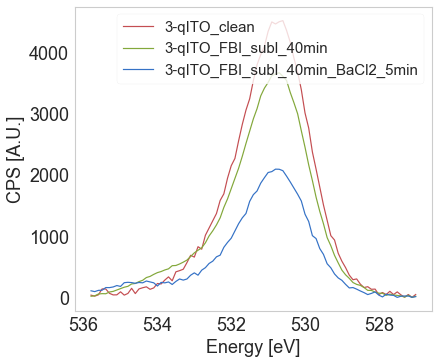

In [168]:
cropped = []
for xp in qito[2:]:
    cropped.append(crop_spectrum(xp, 'O1s', eup=535.8))
    plot_region(cropped[-1], 'O1s')

#####  Set weights for fit residual by statistics (stat_w: higher signal is less weighted) and by energy (energy_w: lower BE has less physical bg)

Since y contains a zero (bg subtraction) introduce a small offset

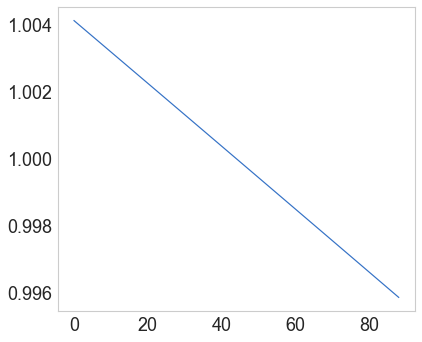

In [194]:
stat_w = 1/np.sqrt(y+3.75)
energy_w = np.sqrt(x)/np.sqrt(np.average(x))
plt.plot(energy_w)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a29e77dd8>, 377.4498450705609)

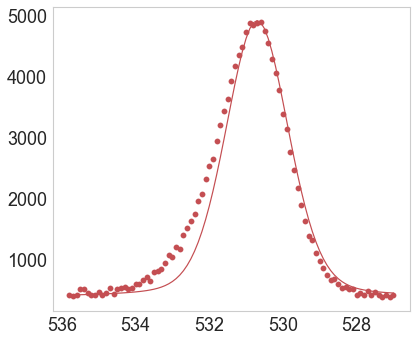

In [218]:
xp = cropped[0]
region = 'O1s'
mod = PseudoVoigtModel(prefix='v1_')
x = xp.dfx[region].dropna().energy.values
y = xp.dfx[region].dropna().counts.values
pars = guess_pars(mod, x, y, prefix='v1_')
pars['v1_center'].set(value=530.7, vary=False)
pars['v1_fraction'].set(value=0.7, min=0.3, max=0.9)

fitv = mod.fit(y, pars, weights=stat_w*energy_w , x=x)
xp.fit[region] = fitv
plot_fit_result(xp, region, plot_comps=False)

In [222]:
pars_v1 = {'v1_sigma': 1.0085, 'v1_center': 530.70, 'v1_fraction': 0.30}
for k, v in pars_v1.items():
    print(k, v)

v1_sigma 1.0085
v1_center 530.7
v1_fraction 0.3


Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars


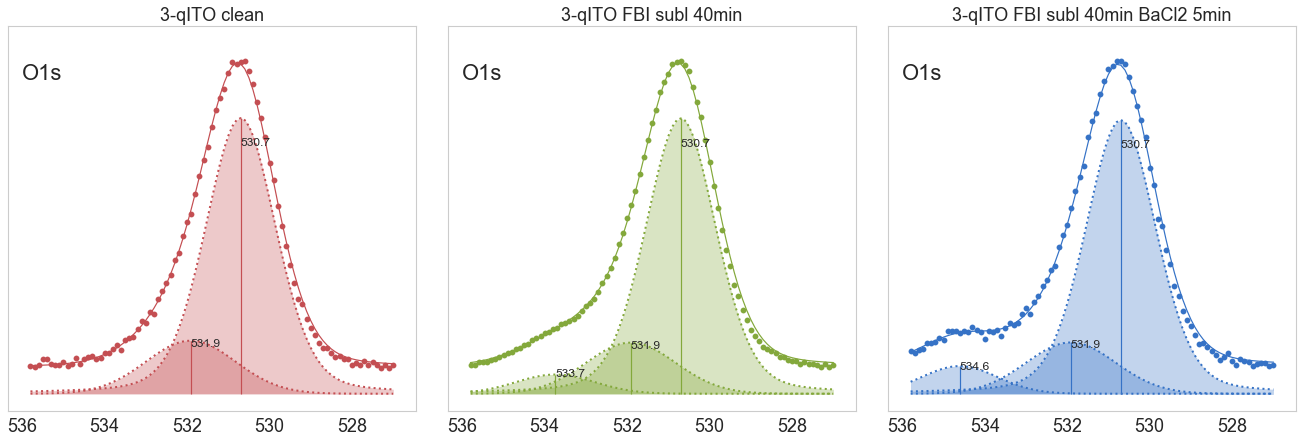

In [284]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6 ), )
region = 'O1s'
pars_v2 = ['v2_sigma', 'v2_center', 'v2_fraction']
pars_v1 = {'v1_sigma': 1.0085, 'v1_center': 530.70, 'v1_fraction': 0.30}
for i,xp in enumerate(cropped):
    Fn = XPFit(xp, region=region)
    for k, v in pars_v1.items():
        Fn.preset_pars(k, v)
    if i > 0:
        for p in pars_v2:
            Fn.preset_pars(p, cropped[0].fit[region].best_values[p])
    if i == 1: Fn.preset_pars('v2_amplitude', 1663.96)
    if i == 2: Fn.preset_pars('v2_amplitude', 954.3830)
        
    fitv = Fn.double_voigt(sepPt=532)
    if i > 0:
        pars, bounds = [500, 533, 1], [(300, 800), (532.5, 535), (0.7, 1.5)]
        fitvg = Fn.gauss_shoulder(fitv, par_g = pars, bounds_g = bounds, Ng=1)
#     if i > 1:
#         pars, bounds = [500, 533, 1], [(300, 800), (530.5, 535), (0.7, 1.5)]
#         Fn.gauss_shoulder(fitvg, par_g = pars, bounds_g = bounds, Ng=2)
    plot_fit_result(xp, region, ax=ax[i], flag_fill=True)
    Fn.set_areas()
    ax[i].set(title=xp.name.replace('_', ' '))
    ax[i].text(s=region, x=536, y=(ax[i].get_ylim()[1]*0.9), fontsize=22)
    ax[i].set(yticks=[], ylim=tuple([yl * 1.05 for yl in ax[i].get_ylim()]))

plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.08)
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/fits_o1s.png', dpi=200)

In [285]:
cropped[1].fit[region].redchi, cropped[2].fit[region].redchi

(2539.4153780410256, 1170.1459989253908)

In [264]:
iratio = cropped[0].fit[region].best_values['v2_amplitude'] / cropped[0].fit[region].best_values['v1_amplitude'] 
iratio*cropped[1].fit[region].best_values['v1_amplitude'], cropped[1].fit[region].best_values['v2_amplitude']

(1736.6904538289004, 1663.96)

In [266]:
iratio1 = cropped[1].fit[region].best_values['v2_amplitude'] / cropped[1].fit[region].best_values['v1_amplitude'] 
iratio1, iratio

(0.21095412535523364, 0.22017477325191678)

In [272]:
iratio = cropped[0].fit[region].best_values['v2_amplitude'] / cropped[0].fit[region].best_values['v1_amplitude'] 
iratio*cropped[2].fit[region].best_values['v1_amplitude'], cropped[2].fit[region].best_values['v2_amplitude']

(983.0930780815758, 954.383)

In [273]:
iratio2 = cropped[2].fit[region].best_values['v2_amplitude'] / cropped[2].fit[region].best_values['v1_amplitude'] 
iratio2, iratio

(0.21374482773344042, 0.22017477325191678)

In [278]:
cropped[0].area['O1s_v1_'],cropped[0].area['O1s_v2_'], cropped[1].area['O1s_v1_'],cropped[1].area['O1s_v2_'], cropped[2].area['O1s_v1_'],cropped[2].area['O1s_v2_']

(0.8128206368868508,
 0.18717936311314914,
 0.7629147229031326,
 0.17165775613086826,
 0.7296575024776769,
 0.1688484235976888)

In [277]:
cropped[2].area['O1s_g1_'],cropped[2].area['O1s_g2_'], cropped[1].area['O1s_g1_'],cropped[1].area['O1s_g2_']

(0.049108041756992,
 0.052386032167642316,
 0.03081792434594469,
 0.034609596620054306)

### Subtract qITO contribution v1 and v2

[Text(0.5, 1.0, 'v1, v2 subtraction')]

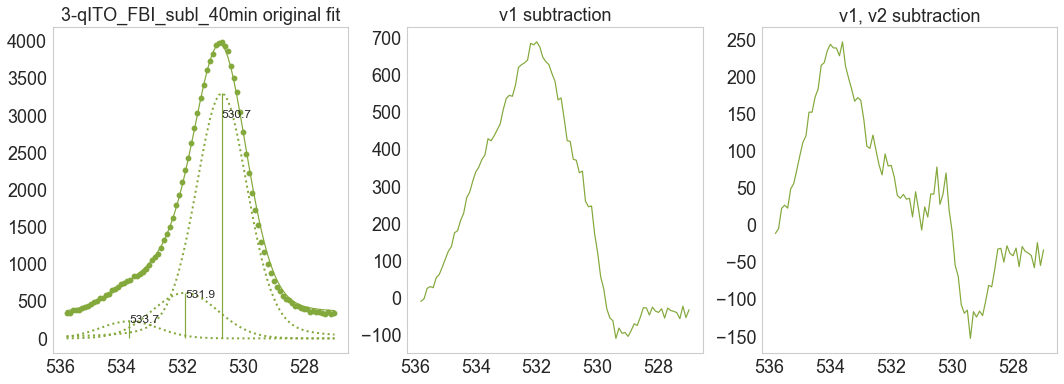

In [302]:
xp = cropped[1]
region = 'O1s'
x = xp.dfx[region].dropna().energy.values
y = xp.dfx[region].dropna().counts.values

fitRes = xp.fit[region]
comps = fitRes.eval_components(x=x)
yv1 = comps['v1_']
yv2 = comps['v2_']
ys1 = y - yv1
ys2 = ys1 - yv2

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6))
plot_fit_result(xp, region, ax=ax[0])
ax[0].set(title=xp.name+ ' original fit')
lim = ax[0].get_ylim()
ax[1].plot(x, ys1, 'g')
ax[1].set(title='v1 subtraction')#, ylim=lim, yticks=[])
ax[2].plot(x, ys2, 'g')
ax[2].set(title='v1, v2 subtraction')#, ylim=lim, yticks=[])


[[], Text(0.5, 1.0, 'v1, v2 subtraction')]

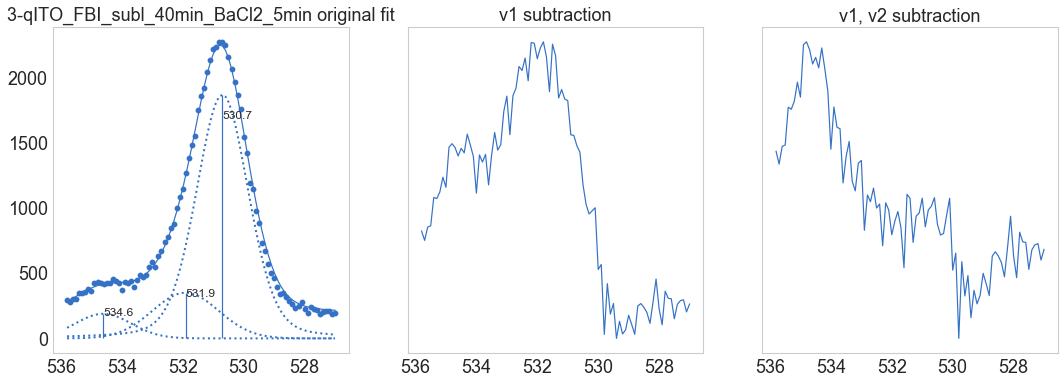

In [303]:
xp = cropped[2]
region = 'O1s'
x = xp.dfx[region].dropna().energy.values
y = xp.dfx[region].dropna().counts.values

fitRes = xp.fit[region]
comps = fitRes.eval_components(x=x)
yv1 = comps['v1_']
yv2 = comps['v2_']
ys1 = y - yv1
ys2 = ys1 - yv2

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(18, 6))
plot_fit_result(xp, region, ax=ax[0])
ax[0].set(title=xp.name+ ' original fit')
lim = ax[0].get_ylim()
ax[1].plot(x, ys1)
ax[1].set(title='v1 subtraction', yticks=[])#, ylim=lim)
ax[2].plot(x, ys2)
ax[2].set(title='v1, v2 subtraction', yticks=[])#, ylim=lim)


## Store results

In [15]:
for xp in qito:
    write_processed_xp(xp.path, xp)

Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_FBI_subl_60min.uxy.ft successful
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_15_qITO/proc/20210415_1-qITO_clean.uxy.ft successful
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_clean.uxy.ft successful
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min.uxy.ft successful
Storing of file /Users/pabloherrero/sabat/xps_spectra/ITO_FBI/qITO_subl/2021_04_28_qITO/proc/20210428_3-qITO_FBI_subl_40min_BaCl2_5min.uxy.ft successful


## Corrected stoichiometry

In [39]:
qito[2].area['O1s_c'] = qito[2].area['O1s'] * qito[2].area['O1s_v2_']

qito[3].area['O1s_c'] = qito[3].area['O1s'] * qito[3].area['O1s_v2_']

In [92]:
selection = [qito[0], qito[2], qito[3]]
make_stoichometry_table(selection, num=('N1s', 'C1s', 'C1s'), denom=('O1s_c', 'N1s', 'O1s_c'))
print('FBI nominal \t', 3/5, '\t', 31/5)

Experiment	N/O	C/N	C/O	
1-qITO_FBI_subl_60min	0.47 	 7.82 	 3.69 	 
3-qITO_FBI_subl_40min	0.34 	 7.95 	 2.68 	 
3-qITO_FBI_subl_40min_BaCl2_5min	0.60 	 6.41 	 3.84 	 
FBI nominal 	 0.6 	 6.2


In [94]:
make_stoichometry_table(selection[1:], num=('In3d', 'In3d', 'N1s', 'Cl2p'), denom=('O1s', 'Sn3d', 'Ba3d', 'Ba3d') )

Experiment	In/O	In/Sn	N/Ba	Cl/Ba	
3-qITO_FBI_subl_40min	1.59 	 17.54 	 4.79 	 1.21 	 
3-qITO_FBI_subl_40min_BaCl2_5min	1.58 	 11.57 	 0.09 	 0.43 	 


##### The component of O 1s at 534.7 might be the contribution from chelated molecules, if so its ratio is 0.3


In [61]:
ratio_chelated = qito[3].area['O1s_g1_'] / qito[3].area['O1s_v2_']
ratio_chelated

0.2928526572803757

## Coverage

In [108]:
inds = [[0, 1], [2, 4]]
layers_fbi = arrange_coverages(qito, inds,
                              r_ml = 1.1*nm, region='In3d', mfp = 3.05*nm, takeoff = 10)
print(layers_fbi)

inds = [[3, 2]]
layers_ba = arrange_coverages(qito, inds,
                              r_ml = 1*nm, region='In3d', mfp = 2.36*nm, takeoff = 10)
print(layers_ba)

[[1.15830161 0.03007129]
 [0.65401532 0.00713709]]
[[1.25263991 0.03110599]]


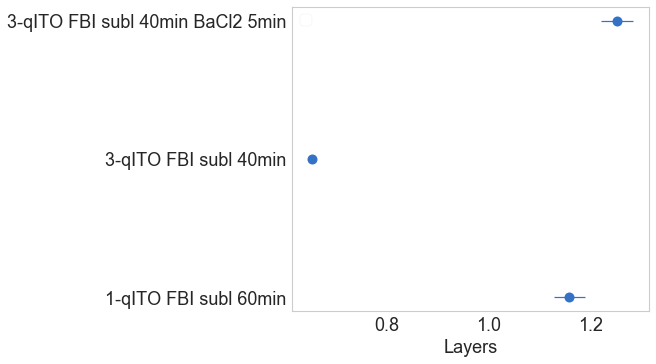

In [109]:
plot_coverages(qito)

In [125]:
thickness = layer_thickness(qito[2], qito[4], region='In3d', mfp=3.05*nm, takeoff=10)
thickness[0]/ nm 

0.6566802953937487

In [126]:
r_fbi = 0.683 * nm   # from Fernando's calculation, globularity 1
V_fbi = r_fbi**3 * 4/3* np.pi

a_fov = np.pi*1**2          # Assume an homogeneous layer of radius 1 mm2
V_fov = a_fov * thickness[0]
dV_fov = a_fov * thickness[1]

In [127]:
V_fov

2.063021991766176e-06

In [132]:
print('%.2e' %(4e12*0.05))

2.00e+11


In [134]:
print('%.2e' %(5e11*0.2))

1.00e+11


In [118]:
from invisible_cities.core.system_of_units import mm2, micron2

In [103]:
density_u = fbi_n_density((qito[0].area['layers'] * nm, qito[0].area['dlayers'] * nm))
density_u[0]/mm2, density_u[1]/mm2

(2726596.1229711813, 70786.61851923093)

In [105]:
print('Expect %.2e ± %.2e unchelated molecules / mm2' %(density_u[0], density_u[1]))

Expect 2.73e+06 ± 7.08e+04 unchelated molecules / mm2


In [72]:
density = fbi_n_density((qito[2].area['layers'] * nm, qito[2].area['dlayers'] * nm))
density[0]/mm2, density[1]/mm2

(1539526.1551265672, 16800.419196556184)

In [120]:
qito[2].area['layers']

0.6540153164311279

In [119]:
density[0]*micron2

1.539526155126567

In [76]:
print('Ratio chelated/unchelated molecules: %.2f' %ratio_chelated)
print('Expect %.2e ± %.2e unchelated molecules / mm2' %(density[0] * (1-ratio_chelated), density[1] * (1-ratio_chelated)))
print('Expect %.2e ± %.2e chelated molecules / mm2' %(density[0] * ratio_chelated, density[1] * ratio_chelated))

Ratio chelated/unchelated molecules: 0.29
Expect 1.09e+06 ± 1.19e+04 unchelated molecules / mm2
Expect 4.51e+05 ± 4.92e+03 chelated molecules / mm2


## Fits C 1s

Modify user pars
Modify user pars


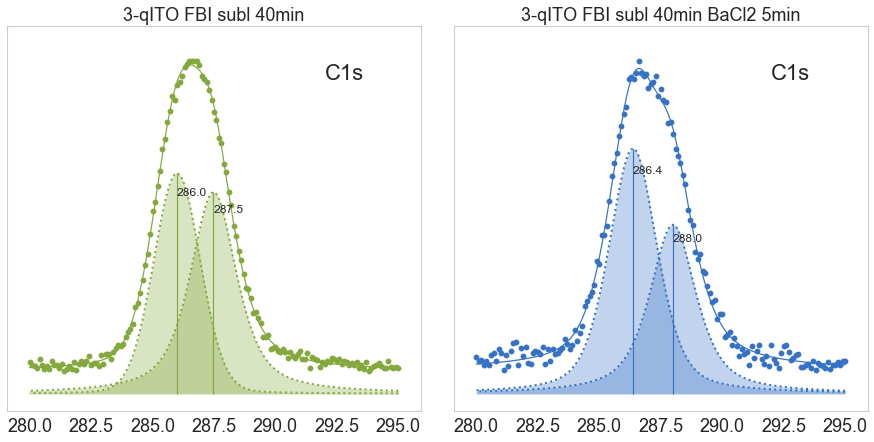

In [117]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 6 ), )
region = 'C1s'

for i,xp in enumerate(qito[2:4]):
    Fn = XPFit(xp, region=region)

    Fn.preset_pars('v2_sigma', 1.1211)
    fitv = Fn.double_voigt(sepPt=286.5)
#     if i == 1:
#         pars, bounds = [500, 535, 1], [(300, 800), (534.3, 535.5), (0.7, 1.5)]
#         Fn.gauss_shoulder(fitv, par_g = pars, bounds_g = bounds, Ng=1)
    plot_fit_result(xp, region, ax=ax[i], flag_fill=True)
    Fn.set_areas()
    ax[i].set(title=xp.name.replace('_', ' '))
    ax[i].text(s=region, x=292, y=(ax[i].get_ylim()[1]*0.9), fontsize=22)
    ax[i].set(yticks=[], ylim=tuple([yl * 1.05 for yl in ax[i].get_ylim()]))

plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
plt.subplots_adjust(hspace=.0)
plt.subplots_adjust(wspace=.08)
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublim_v2/fits_o1s.png', dpi=200)

# Compare to DEA on vITO

In [158]:
filesvito = ['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy',
             '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_alcohol/proc/20200206_ITO_DEA_alcohol_12min_sublim.xy',
             '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/proc/20200214_ITO_DEA_ester_10min_sublim.xy',
            '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/sublim/proc/20201124_ITO_clean.xy',
            '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/sublim/proc/20201124_ITO_FBI_subl_10min.xy']
#              '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/proc/20200218_ITO_DEA_ester_10min_sublim.xy',
#              '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/ITO_DEA_ester_HeUV/proc/20200218_ITO_DEA_esther_HeUV_45min.xy']

In [159]:
vito = [read_processed_xp(f) for f in filesvito]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/proc/20200131_ITO_DEA_acid_10min_sublim.xy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_alcohol/proc/20200206_ITO_DEA_alcohol_12min_sublim.xy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/proc/20200214_ITO_DEA_ester_10min_sublim.xy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/sublim/proc/20201124_ITO_clean.xy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBI/sublim/proc/20201124_ITO_FBI_subl_10min.xy.ft', returning empty fit dict


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26fbdcc0>,
      dtype=object)

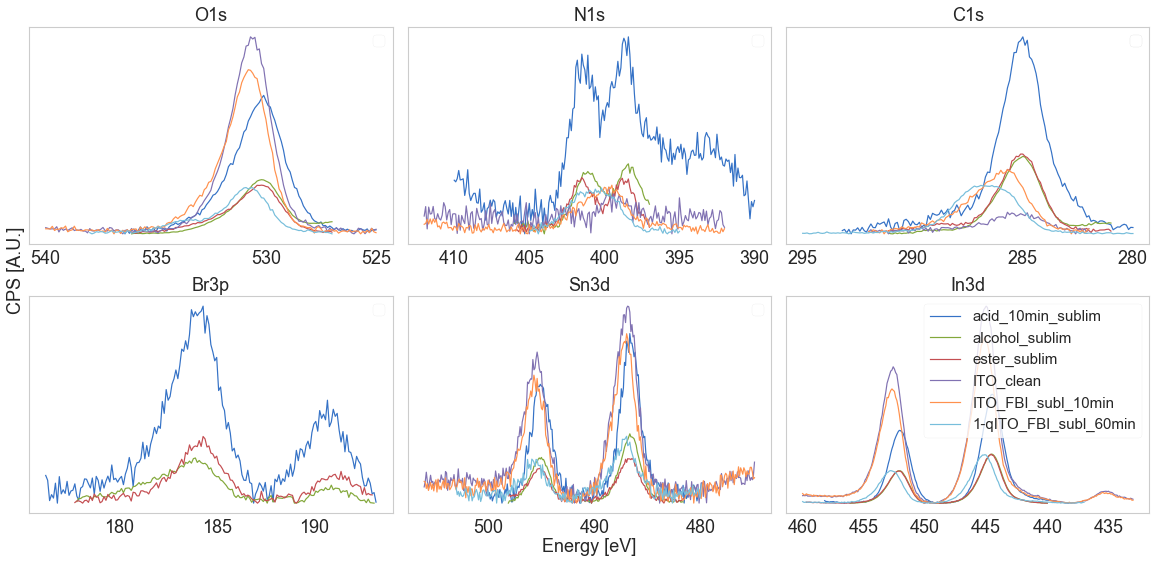

In [160]:
regs = ['O1s', 'N1s', 'C1s', 'Br3p', 'Sn3d', 'In3d']
plot_xp_regions(vito+[qito[0]], regs)

### Make sure there is no Ta 4d (it would appear at 229, 240 eV)

[(100, 12000.0), (250, 220)]

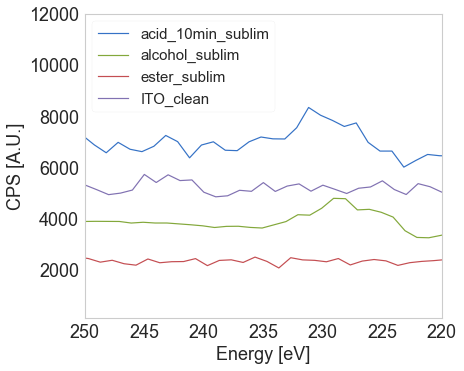

In [162]:
for xp in vito[:-1]:
    plot_region(xp, 'overview')
    
plt.gca().set(xlim=(250, 220), ylim=(100, 1.2e4))

### Shift spectra

In [163]:
for xp in vito:
    shift = find_shift(xp, qito[0], 'In3d')
    align_dfx(xp, shift, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a296eb780>,
      dtype=object)

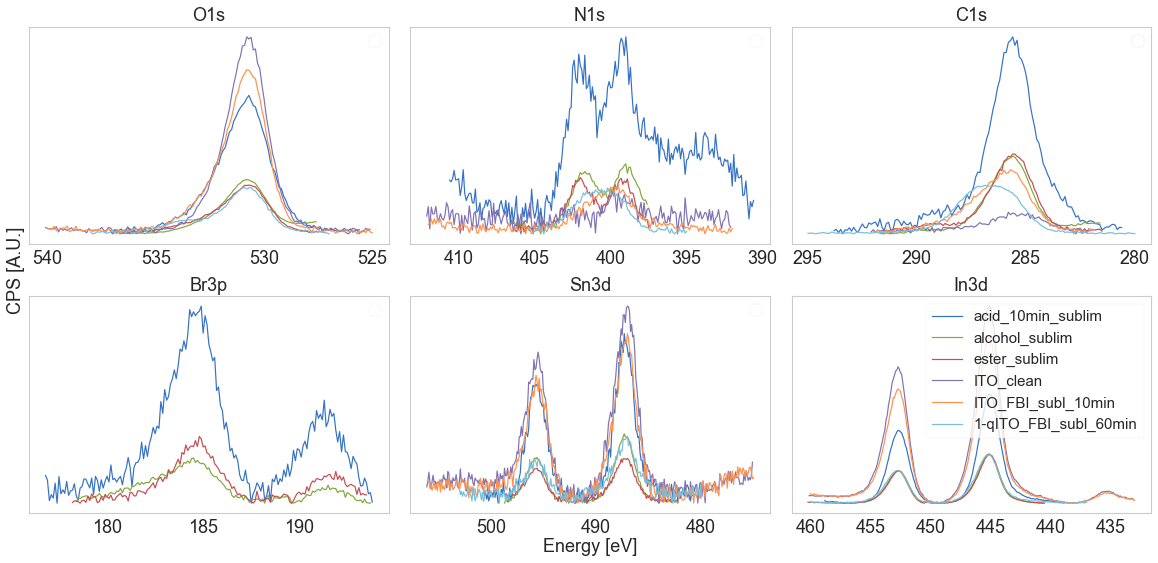

In [164]:
regs = ['O1s', 'N1s', 'C1s', 'Br3p', 'Sn3d', 'In3d']
plot_xp_regions(vito+[qito[0]], regs)

## Compare N 1s and C 1s, take only ester (clearest absence of Ta)

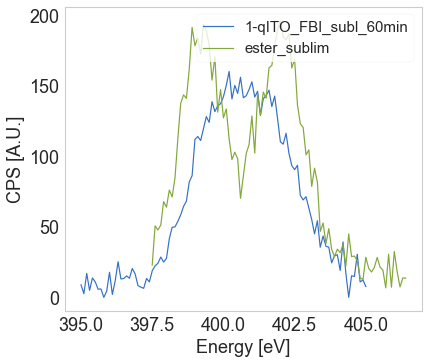

In [86]:
region = 'N1s'
# for xp in qito:
plot_region(qito[0], 'N1s')
    
plot_region(vito[2], 'N1s')

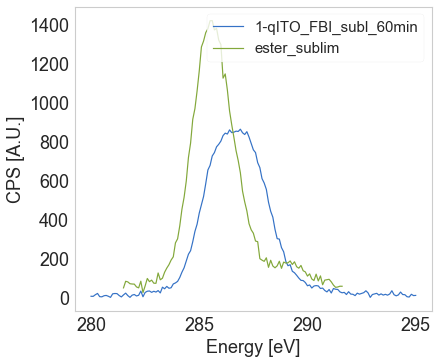

In [87]:
region = 'C1s'

plot_region(qito[0], region)
    
plot_region(vito[2], region)

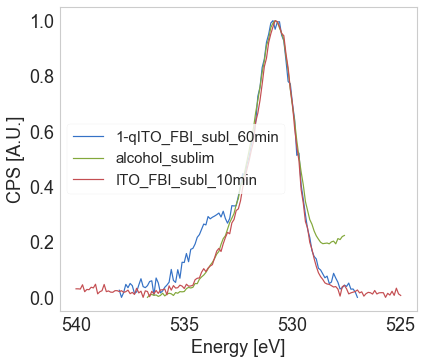

In [167]:
region = 'O1s'

plot_region(normalise_dfx(qito[0]), region)
    
plot_region(normalise_dfx(vito[1]), region)
plot_region(normalise_dfx(vito[4]), region)

## Stoichiometry vITO

'Br3p' region does not exist in ITO_clean


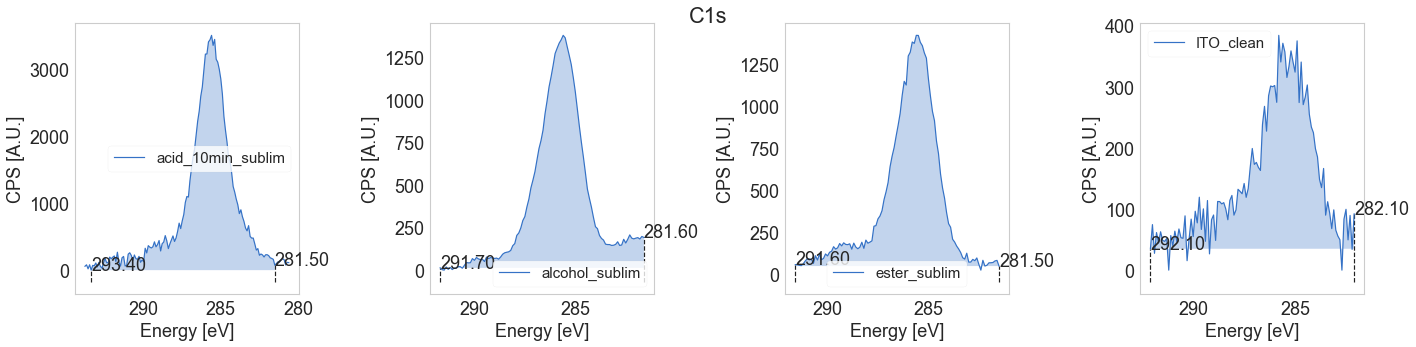

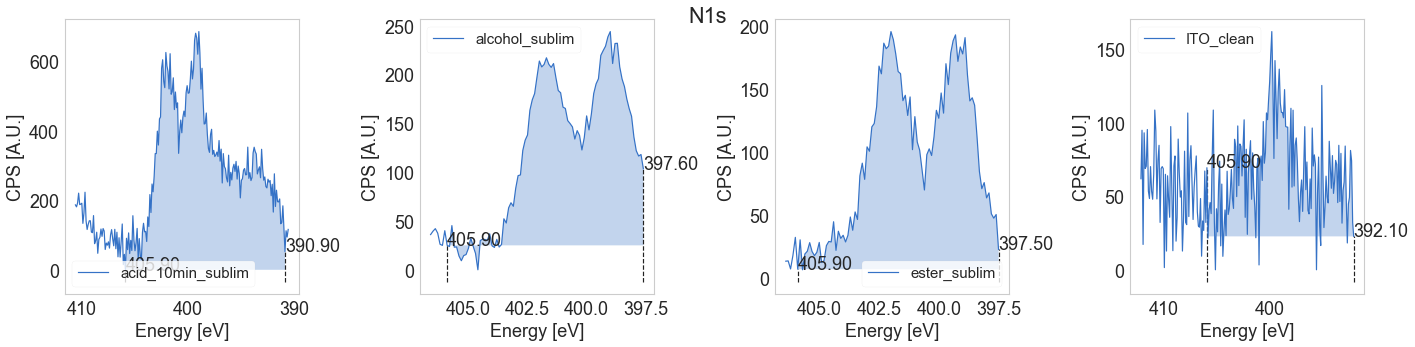

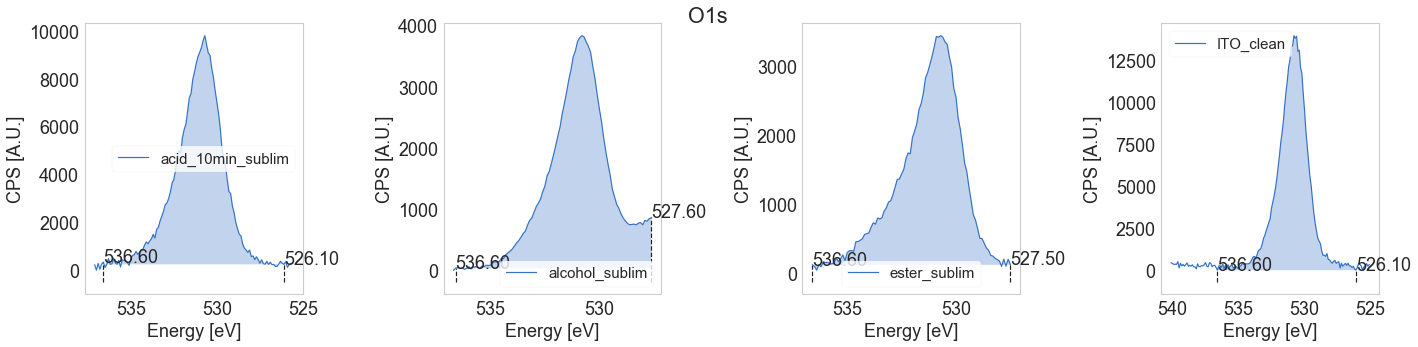

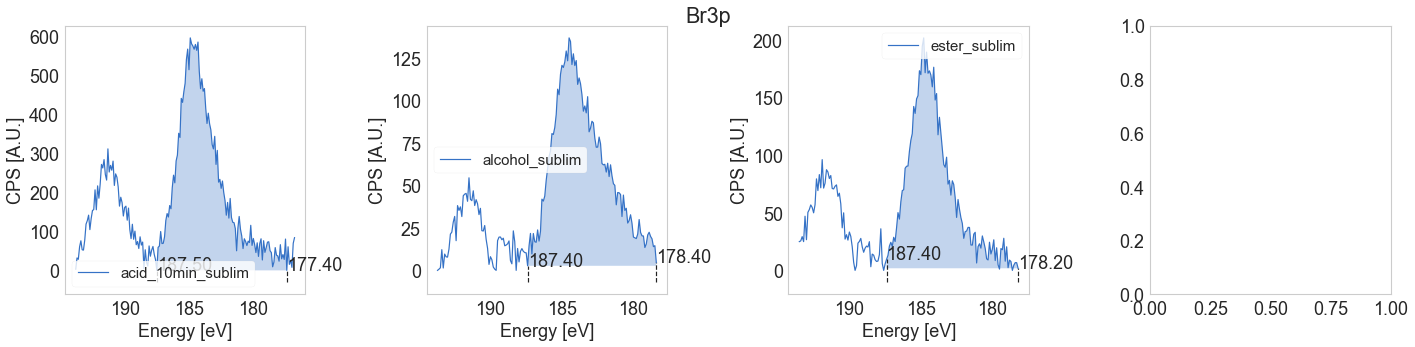

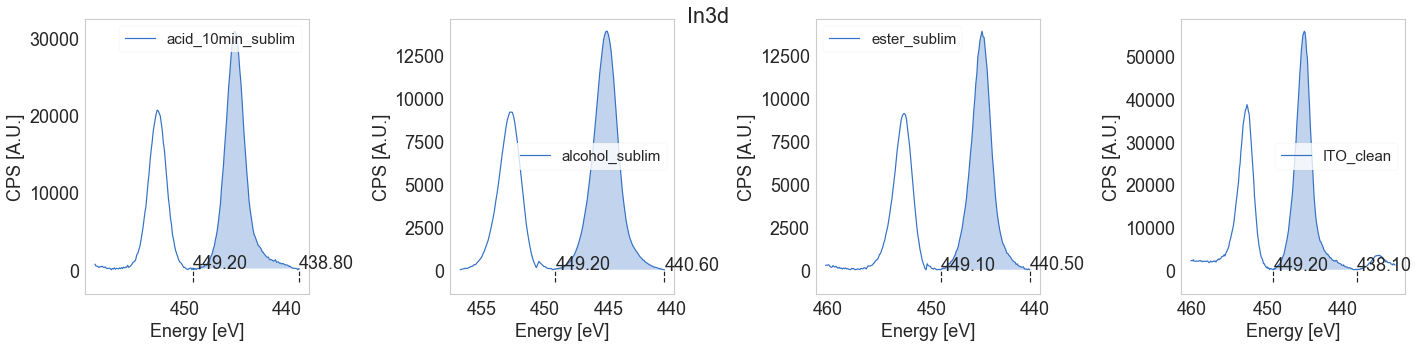

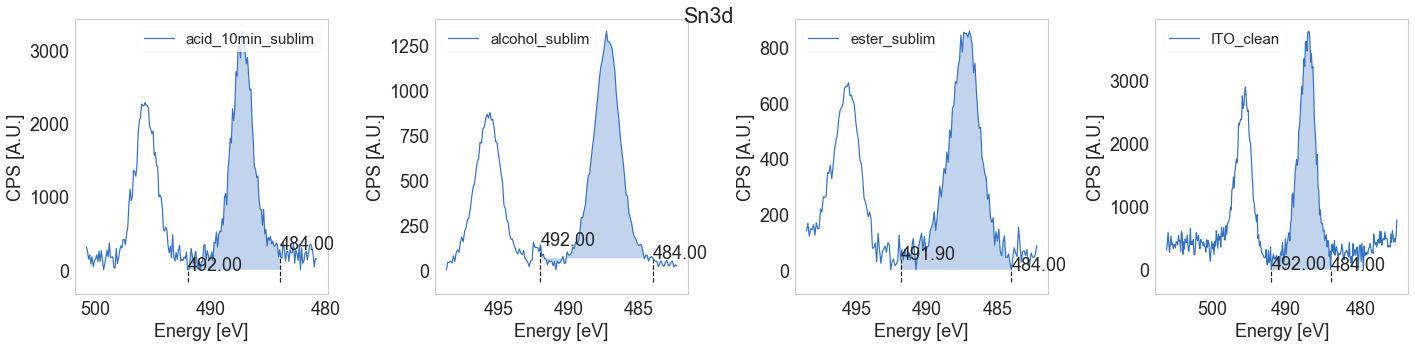

In [136]:
regions = ['C1s', 'N1s', 'O1s', 'Br3p', 'In3d', 'Sn3d']
    #indRefs = [0, 0, 0, 1, 0, 0]

for i,r in enumerate(regions):
    integrateRegions(vito, region=r, asf=asf)#, indRef=indRefs[i])


'Br3p' region does not exist in ITO_clean


[2975.6217520291802, 672.5539526432271, 846.0412097349067]

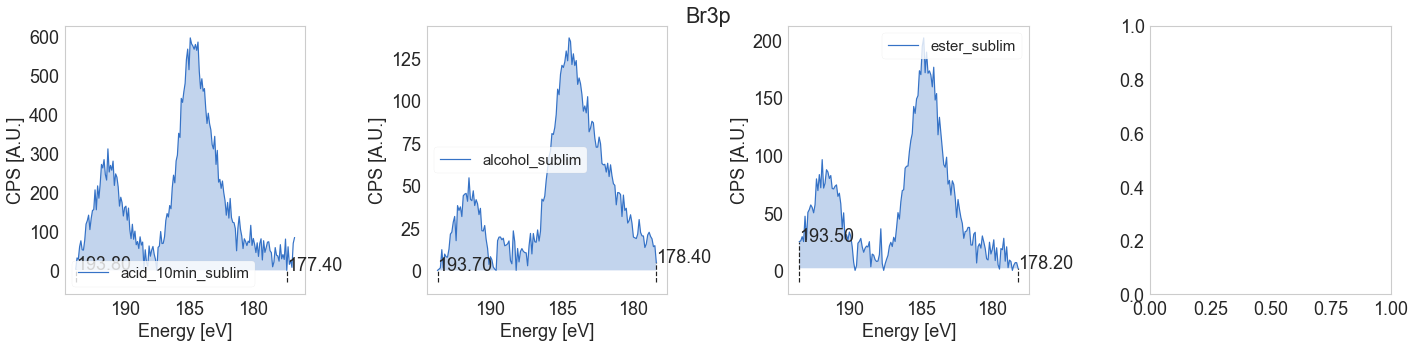

In [137]:
integrateRegions(vito, 'Br3p', asf, eup=194, edw=177.4, )

In [138]:
make_stoichometry_table(vito, num=('In3d', 'In3d'), denom=('O1s', 'Sn3d'))

Experiment	In/O	In/Sn	
acid_10min_sublim	0.41 	 9.77 	 
alcohol_sublim	0.47 	 10.88 	 
ester_sublim	0.50 	 14.40 	 
ITO_clean	0.67 	 14.22 	 
